In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

# Beirut explosion

$ \frac{5}{2} \, \log R = \frac{5}{2} \, \log\left(S \sqrt[5]{\frac{E}{\rho}}\right) + \log t$

In [34]:
import cv2

video = cv2.VideoCapture("/data/beirut5.mp4");

# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
    
video.release(); 

Frames per second using video.get(cv2.CAP_PROP_FPS) : 0.0


In [50]:
import cv2
cam = cv2.VideoCapture("data/beirut5.mp4")
fps = cam.get(cv2.CAP_PROP_POS_MSEC)
fps

0.0

In [43]:
vidcap = cv2.VideoCapture('data/beirut5.mp4')
fps = vidcap.get(cv2.CAP_PROP_FPS)
success,image = vidcap.read()
count = 0
success = True
fps
# while success:
#     success,frame = vidcap.read()
#     count+=1
#     print("time stamp current frame:",count/fps)

29.979577944179713

In [44]:
1/fps

0.03335603996366939

In [57]:
import cv2

cap = cv2.VideoCapture('data/beirut5.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)

timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]
calc_timestamps = [0.0]

while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
        timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
        calc_timestamps.append(calc_timestamps[-1] + 1000/fps)
    else:
        break
for idx, t in enumerate(timestamps):
    print(idx, t)
# cap.release()

# for i, (ts, cts) in enumerate(zip(timestamps, calc_timestamps)):
#     print('Frame %d difference:'%i, abs(ts - cts))

# import time

# starttime = time.time()

# # get frame
# timestamp = time.time() - starttime
# cv2.putText(frame,timestamp,(10,500), font, 4,(255,255,255),2,cv2.CV_AA)

0 0.0
1 33.356039963669396
2 66.71207992733879
3 100.06811989100818
4 133.42415985467758
5 166.78019981834697
6 200.13623978201636
7 233.49227974568575
8 266.84831970935517
9 300.20435967302456
10 333.56039963669394
11 366.91643960036333
12 400.2724795640327
13 433.6285195277021
14 466.9845594913715
15 500.3405994550409
16 533.6966394187103
17 567.0526793823797
18 600.4087193460491
19 633.7647593097184
20 667.1207992733879
21 700.4768392370572
22 733.8328792007267
23 767.188919164396
24 800.5449591280654
25 833.9009990917348
26 867.2570390554042
27 900.6130790190736
28 933.969118982743
29 967.3251589464124
30 1000.6811989100818
31 1034.0372388737512
32 1067.3932788374207
33 1100.7493188010899
34 1134.1053587647593
35 1167.4613987284288
36 1200.8174386920982
37 1234.1734786557674
38 1267.5295186194369
39 1300.8855585831063
40 1334.2415985467758
41 1367.597638510445
42 1400.9536784741144
43 1434.3097184377839
44 1467.6657584014533
45 1501.0217983651228
46 1534.377838328792
47 1567.733878

In [53]:
# create a folder to store extracted images
import os
folder = 'test'  
os.mkdir(folder)
# use opencv to do the job
import cv2
print(cv2.__version__)  # my version is 3.1.0
vidcap = cv2.VideoCapture('data/beirut5.mp4')
count = 0
while True:
    success,image = vidcap.read()
    if not success:
        break
    cv2.imwrite(os.path.join(folder,"frame{:d}.jpg".format(count)), image)     # save frame as JPEG file
    count += 1
print("{} images are extacted in {}.".format(count,folder))

4.1.0
1101 images are extacted in test.


In [45]:
def generateSRTFile(fileName, duration):
    """ 
    Generate SRT (subtitle) file for micro second display in video 

    fileName: "Movie1.srt"
    duration: "00:12:54"

    NOTE: ignored seconds to make the program more simplified
    """
    # get the hours, min, sec from duration
    time_split = duration.split(':')
    hours = int(time_split[0])
    minutes = int(time_split[1])
    seconds = 59 # int(time_split[2])
    millisecs = [x*10 for x in range(0,100)]

    # open a file to write
    f = open(name=fileName, mode='w', buffering=1)

    # iterate to print to file
    blockNo = 1
    for h in range(hours+1):
        for m in range(minutes+1):
            for s in range(seconds+1):
                for ms in millisecs:
                    f.write(subtitle(h, m, s, ms, blockNo))
                    blockNo += 1
    # close the file
    return f.close()

def subtitle(h, m, s, ms, bn):
    """
    Returns the subtitle block for the given parametes
    h: hours, m: minutes, s: seconds, ms: milli seconds, bn: block number
    """
    block = ""
    block += formatToString(bn) + "\n"
    time_line = formatToString(h)+":"+formatToString(m)+":"+formatToString(s)+","
    block += time_line+formatToString(ms, 3) + " --> " + time_line + \
        formatToString(ms+10 if ms!=990 else 999, 3) + "\n"
    block += "time " + time_line + formatToString(ms ,3) + "\n\n"
    return block

def formatToString(num, length=2):
    """
    Format given number to given length. 
    i.e num = 5 and length = 2. Result = "05" 
    """
    # number of digits in num
    digits = len(str(num))

    # mathematical equivalent for finding digits
    #n = num
    #digits = 0
    #if n==0:
        #digits = 1
    #else:
        #while n:
            #n = n/10
            #digits += 1

    # find how much shorter is num than length
    if digits >= length:
        strNum = str(num)
    else:
        diff = length-digits
        strNum = ""
        for i in range(diff):
            strNum += "0"
        strNum += str(num)
    # return
    return strNum

# if __name__=="__main__":
#     generateSRTFile(fileName='/home/inblueswithu/Downloads/default.srt', duration="00:05:56")

In [49]:
generateSRTFile(fileName='beirut5.srt', duration="00:05:56")

TypeError: Required argument 'file' (pos 1) not found

In [106]:
# https://twitter.com/sinabooeshaghi/status/1290727092884299778
dfb = pd.DataFrame()
dfb['R'] = [185/2, 240/2, 270/2, 315/2, 350/2]
dfb['t'] = [0.050, 0.090, 0.130, 0.180, 0.230]

dfb['5/2*log10_R'] = np.log10(dfb['R'] ) * 5/2
dfb['log10_t'] = np.log10(dfb['t']) 
dfb


df2 = pd.DataFrame()
df2['D'] = [222, 286, 326, 368, 403]
df2['R'] = df2['D'] /2 * 32.19/44#40/51 #200/296
df2['t'] = [11207.629427792916, 11240.985467756585, 11274.341507720255, 11307.697547683923, 11341.053587647593]
df2['t'] -= 11174.273387829247
df2['t'] /= 1000
df2['5/2*log10_R'] = np.log10(df2['R'] ) * 5/2
df2['log10_t'] = np.log10(df2['t']) 

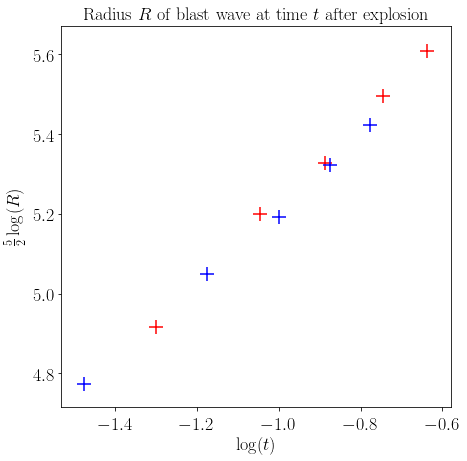

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r')
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=180, marker='+', color='b')
# logt = np.linspace(xmin, xmax, 2)
# ax.plot(logt, logt + 11.915, 'b--')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

(5,) (5, 1)
R^2 = 1.00


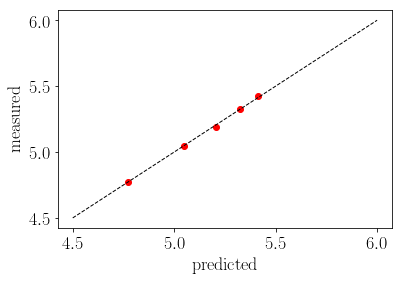

In [108]:
X2 = df2['log10_t'].values.reshape(1, -1).T
y2 = df2['5/2*log10_R'].values
print(y2.shape, X2.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model2 = LinearRegression()
model2.fit(X2, y2)
yhat2 = model2.predict(X2)

print(f'R^2 = {r2_score(yhat2, y2):.2f}')
plt.scatter(yhat2, y2, color='r')
line2 = np.linspace(4.5, 6)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line2, line2, 'k--', linewidth=1);

In [109]:
model2.intercept_, model2.coef_[0]

(6.124788176780884, 0.917207846524293)

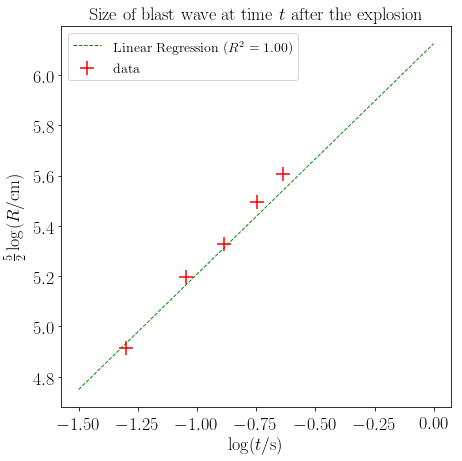

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 7.3, 12
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)
logt2 = np.linspace(-1.5, 0, 2)
# ax.plot(logt, logt + 11.915, 'b--', label='G.I. Taylor (1950)', linewidth=1, zorder=1, alpha=0.95)
ax.plot(logt2, model2.intercept_ + model2.coef_[0] * logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_score(yhat2, y2):.2f}$)', zorder=0, alpha=0.95)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{cm})$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14);
# fig.savefig('plots/BlastWaveSize.pdf', bbox_inches='tight')

In [111]:
from scipy.optimize import fsolve
def loss(i, slope=1):
    """Fixed slope 1-deg polynomial residuals"""
    return ((y2 - (slope*X2 + i))**2).sum()

In [112]:
np.polyfit(dfb['log10_t'].values, y2, 1)

array([0.97034378, 6.04743156])

In [113]:
intercept = fsolve(loss, x0=1)[0]
intercept

c:\users\jsdiaz\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


6.212789840889913

In [114]:
r2_beirut = r2_score(X2 + intercept, y2)
r2_beirut

0.9918288758569973

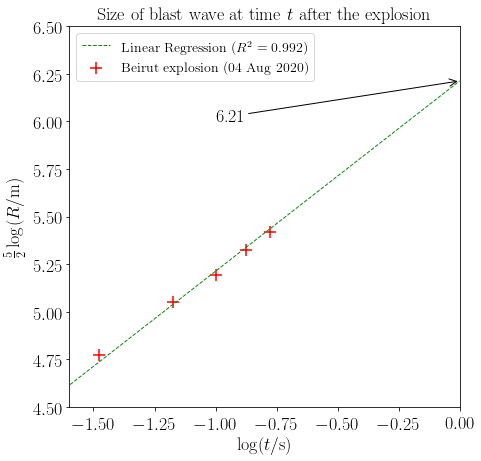

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -1.6, 0
ymin, ymax = 4.5, 6.5 #9.5, 11.5
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
# Beirut
# ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=150, marker='+', color='r', label='Beirut explosion (04 Aug 2020)', zorder=0)
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=150, marker='+', color='r', label='Beirut explosion (04 Aug 2020)', zorder=0)
logt2 = np.linspace(-5, 0, 2)
ax.plot(logt2, intercept + logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_beirut:.3f}$)', zorder=1, alpha=0.95)

ax.annotate(f'{intercept:.2f}', xy=(0, intercept), xytext=(-1, 6), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{m})$', fontsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14, loc='upper left');
# fig.savefig('plots/BlastWaveSize_Beirut.pdf', bbox_inches='tight')

In [116]:
E_J = 10**(intercept * 2/5 * 5) * 1.25 * 0.856 
print(f'energy = {E_J:.2e} J')

energy = 2.85e+12 J


In [117]:
print(f'energy = {E_J/4.18e12:.3f} kt')

energy = 0.682 kt


ammnium nitrate explosive heat: 1447.7 J/g (Review on Thermal Decomposition of Ammonium Nitrate,  Journal of Energetic Materials, Volume 31, pp. 1-26, 2013)

In [25]:
print(f'energy = {1447.7/1e-3 * 2750e3 * 1/4.18e12:.3f}')

energy = 0.952
